In [1]:
import pandas as pd
import numpy as np

In [25]:
final_df = pd.read_csv("..\\data\\final_analysis.csv")
final_df = final_df.drop(final_df.columns[0],axis=1)
final_df

,year,Net Cash Used In Investing Activities,Net Cash Used From Financing Activities,Net Inc/Dec In Cash And Cash Equivalents,Total Revenue,Total Expenses,Profit/Loss For The Period,Total Shareholders Funds,Total Non-Current Liabilities,Total Current Liabilities,Total Capital And Liabilities,Intangible Assets,Total Assets
0,3/1/2022,-8803.19,7308.44,1517.30,6725.53,5491.97,297.56,26531.08,41159.57,6813.40,74670.58,129.01,74670.58
1,3/1/2021,-7966.60,3827.15,-1097.65,6643.46,3733.82,1927.93,21740.58,31570.43,5080.79,58558.33,72.27,58558.33
2,3/1/2020,-31.35,-2580.74,557.86,7546.25,5514.52,1934.25,19795.73,25302.58,6547.80,51812.64,82.46,51812.64
3,3/1/2019,-2403.12,2555.24,3366.53,7679.28,3893.74,2637.72,20425.73,18700.51,8132.30,47424.42,88.85,47424.42
4,3/1/2018,-550.04,-1925.66,-64.45,8141.14,4014.58,2408.10,18209.07,19590.61,2868.05,40833.61,59.98,40833.61
5,3/1/2017,-4181.08,1717.15,-151.42,6163.53,2870.59,3100.61,16783.09,16833.81,5464.95,39247.73,61.51,39247.73
6,3/1/2016,-2953.73,1497.63,256.86,5791.94,2615.02,2964.50,13565.81,11074.91,6488.49,31129.21,57.40,31129.21
7,3/1/2015,-3556.48,1908.94,350.66,4647.52,2499.35,2183.14,11203.16,10257.88,4346.06,25807.10,57.85,25807.10
8,3/1/2014,-2313.63,249.88,-462.14,5025.53,2815.28,2016.17,9335.89,9699.38,1869.11,20904.38,55.82,20904.38
9,3/1/2013,-2445.86,1416.89,340.87,3564.29,1675.10,1754.18,6703.97,8574.11,2977.21,18255.29,59.05,18255.29


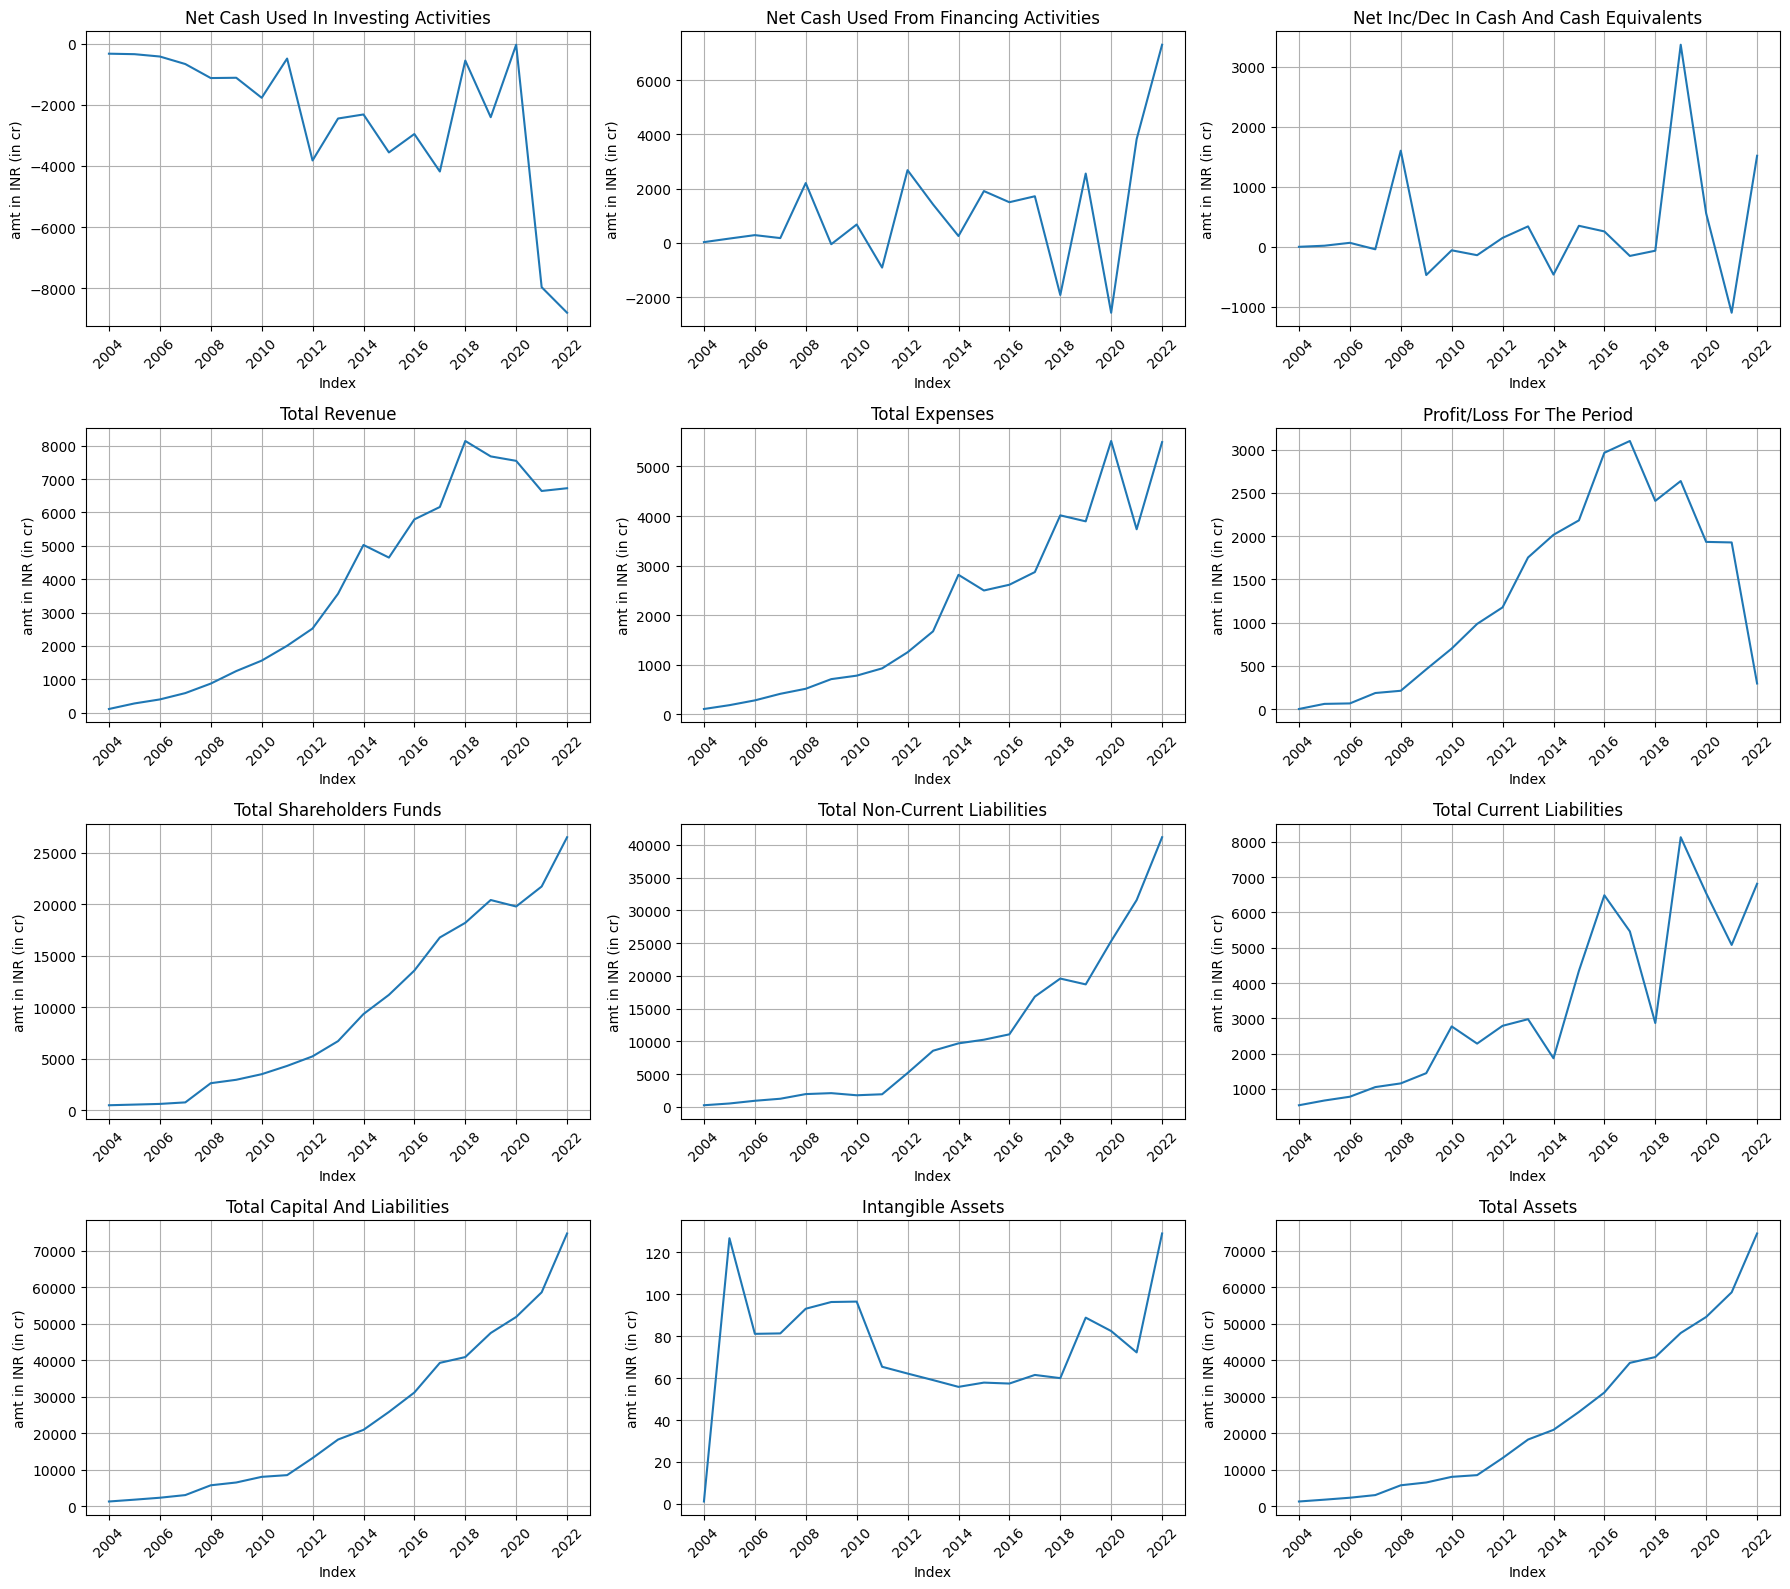

In [18]:
#just graphs
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define the reversed date range from 2004 to 2022
    start_date = pd.Timestamp('2003-03-01')
    end_date = pd.Timestamp('2022-03-01')
    reversed_index = pd.date_range(start=start_date, end=end_date, freq='A').sort_values(ascending=False)

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        ax.plot(reversed_index, df[col])  # Use the reversed index for x-axis values
        ax.set_title(col)
        ax.set_xlabel('Index')
        ax.set_ylabel('amt in INR (in cr)')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', labelrotation=45)

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()


plot_columns_in_grid(final_df)


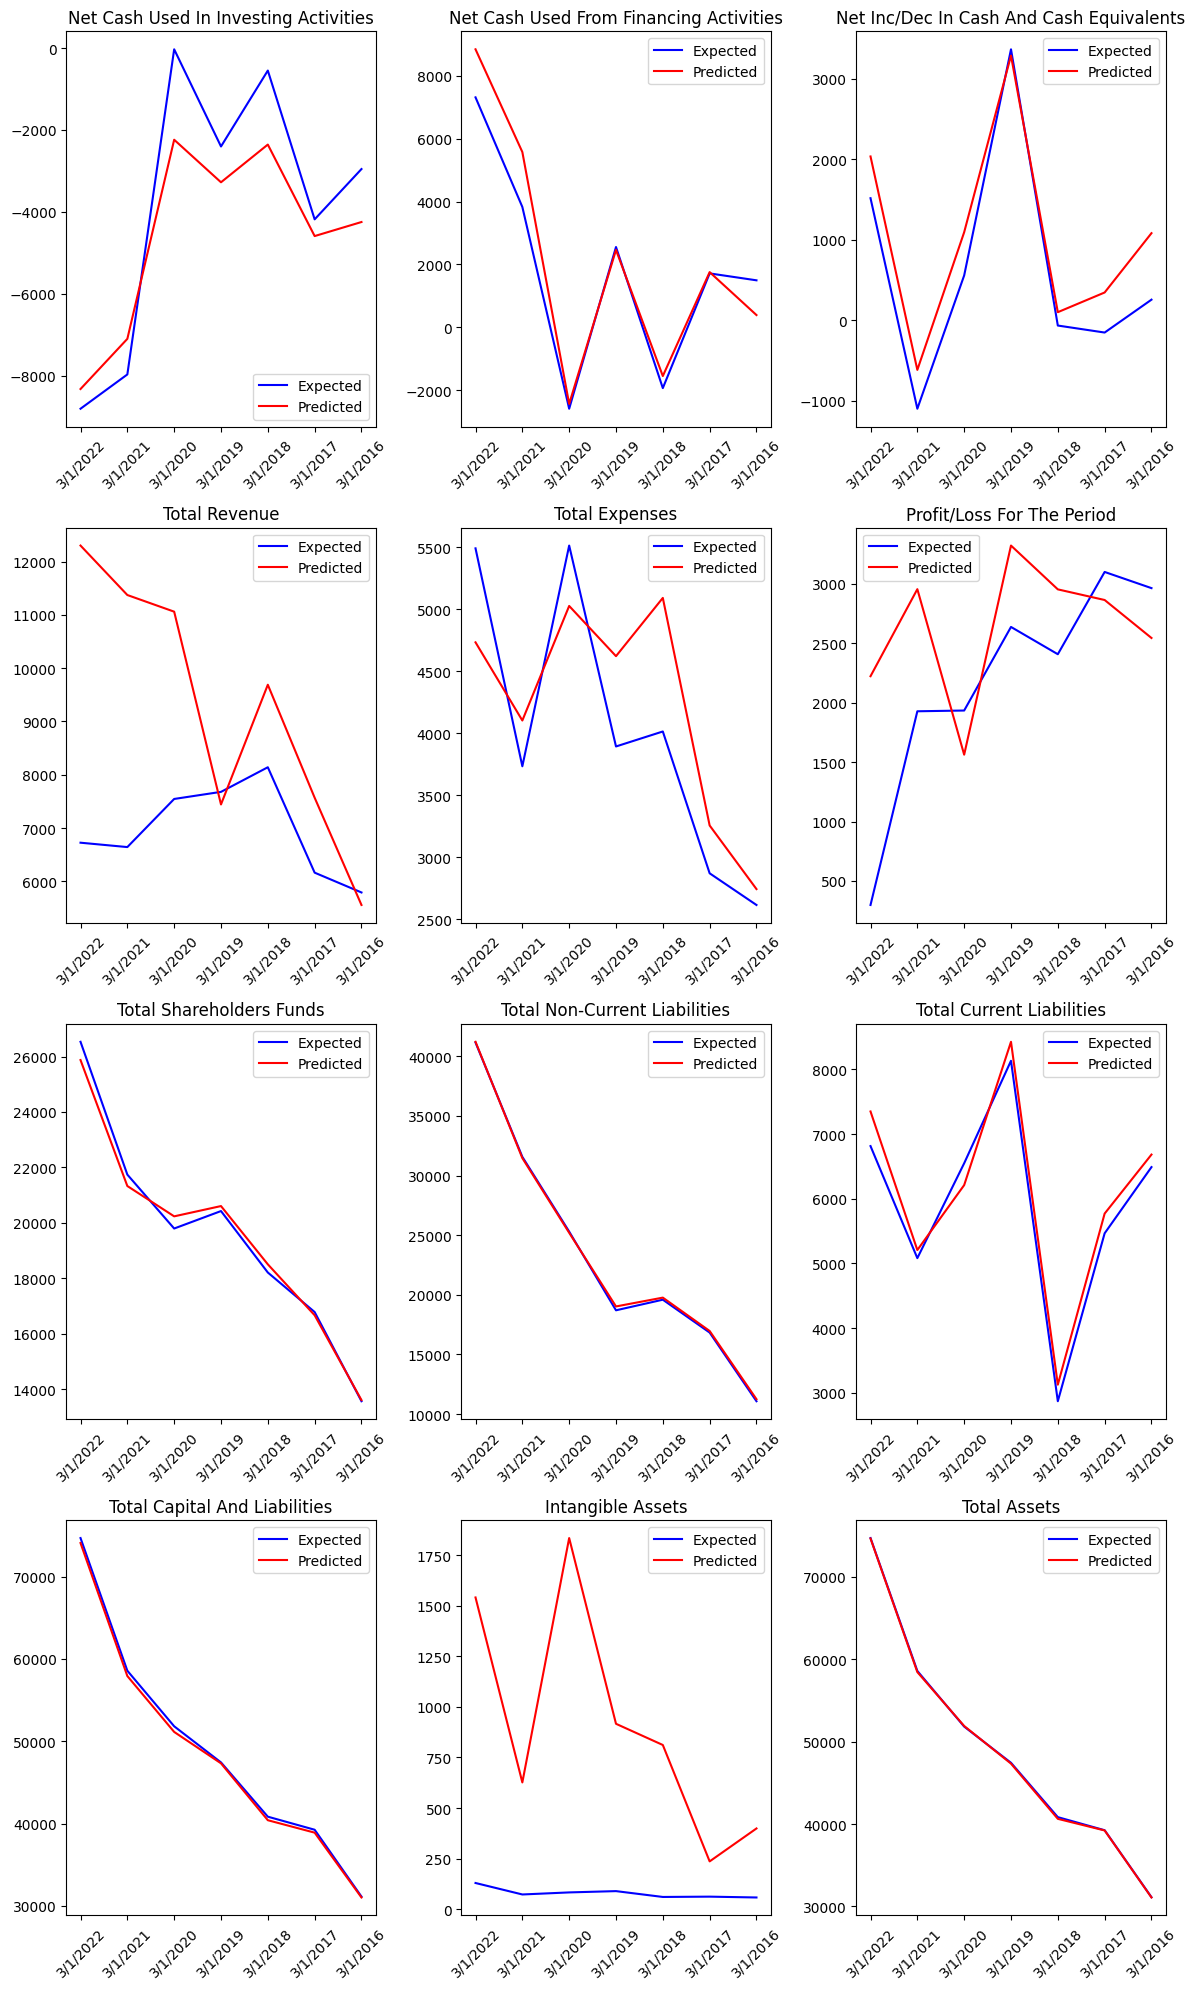

RMSE for Net Cash Used In Investing Activities: 1294.0727
RMSE for Net Cash Used From Financing Activities: 983.3837
RMSE for Net Inc/Dec In Cash And Cash Equivalents: 500.4394
RMSE for Total Revenue: 3168.4929
RMSE for Total Expenses: 633.0792
RMSE for Profit/Loss For The Period: 918.1701
RMSE for Total Shareholders Funds: 364.576
RMSE for Total Non-Current Liabilities: 171.473
RMSE for Total Current Liabilities: 315.8734
RMSE for Total Capital And Liabilities: 475.4467
RMSE for Intangible Assets: 983.5616
RMSE for Total Assets: 108.7336


In [28]:
#MLP 1
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

df_1 = final_df.set_index('year')

predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.4)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(40,90,30), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

# Adjust the number of columns and rows based on your dataset
columns_to_predict = df_1.columns
num_columns = len(columns_to_predict)
num_rows = (num_columns + 2) // 3  # Update the number of rows calculation

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 5 * num_rows))  # Use 3 columns
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")


In [3]:
is_df = pd.read_csv("..\\data\\quarterly_income_statement_processed.csv")


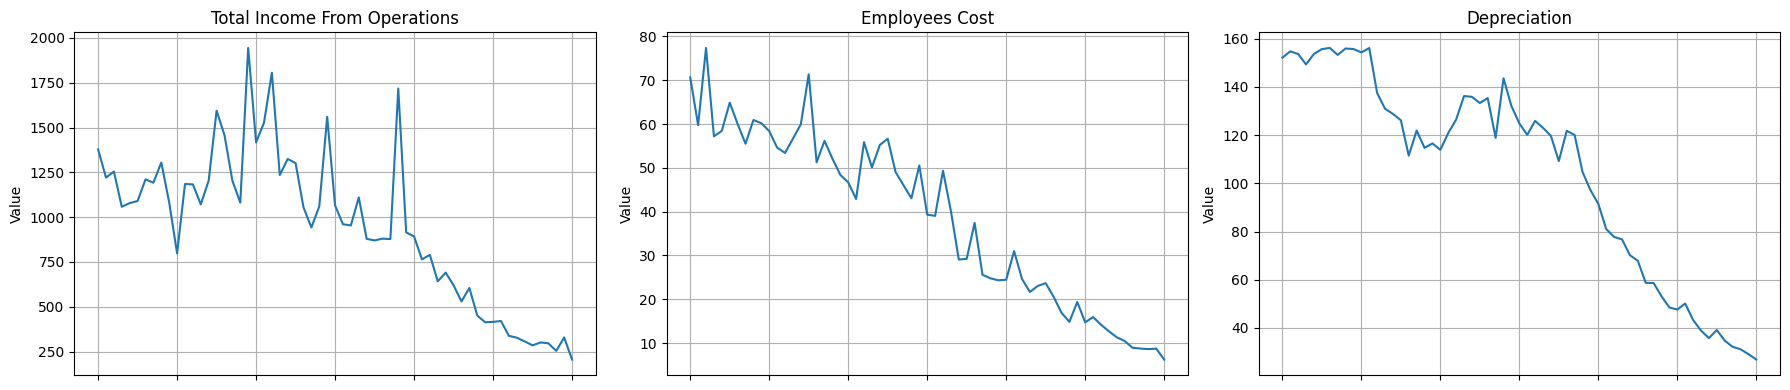

In [72]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        # Reverse the x-axis values and index
        x_values = df.index[::-1]
        y_values = df[col][::-1]

        ax.plot(x_values, y_values)
        ax.set_title(col)
        ax.set_ylabel('Value')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', rotation=45)

        # Remove x-axis labels
        ax.set_xticklabels([])

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()

plot_columns_in_grid(is_df)

# the x-axis values range from 2004 to 2022 with 3 months gap each. I removed the indexes because it was too crowded

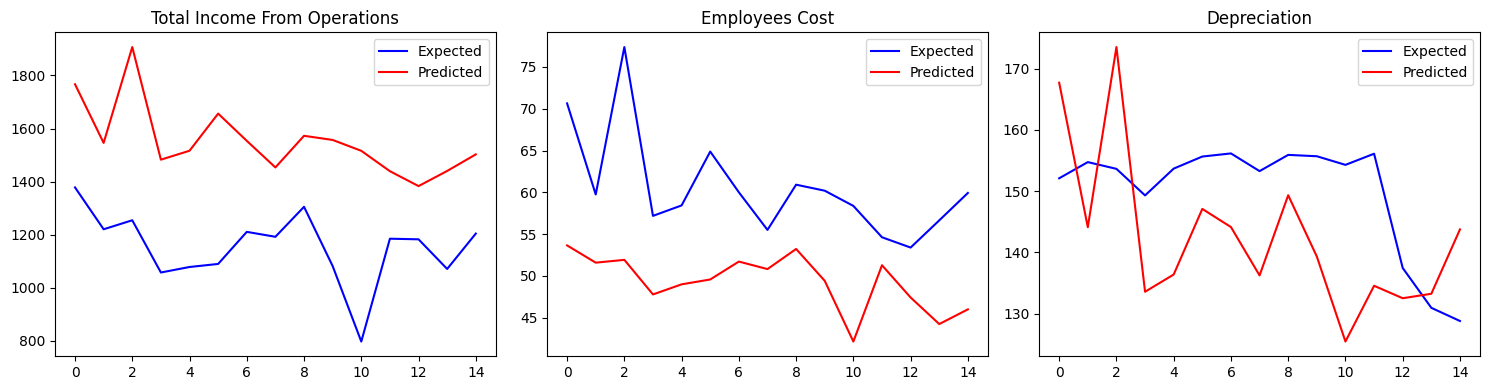

RMSE for Total Income From Operations: 424.584
RMSE for Employees Cost: 12.4848
RMSE for Depreciation: 15.6428


In [78]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

df_1 = is_df.set_index('months')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}  # New dictionary to store RMSE values

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.25)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(35, 70, 70, 50), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns  # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 3  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse,4)}")


1/1 [==============================] - 0s 298ms/step


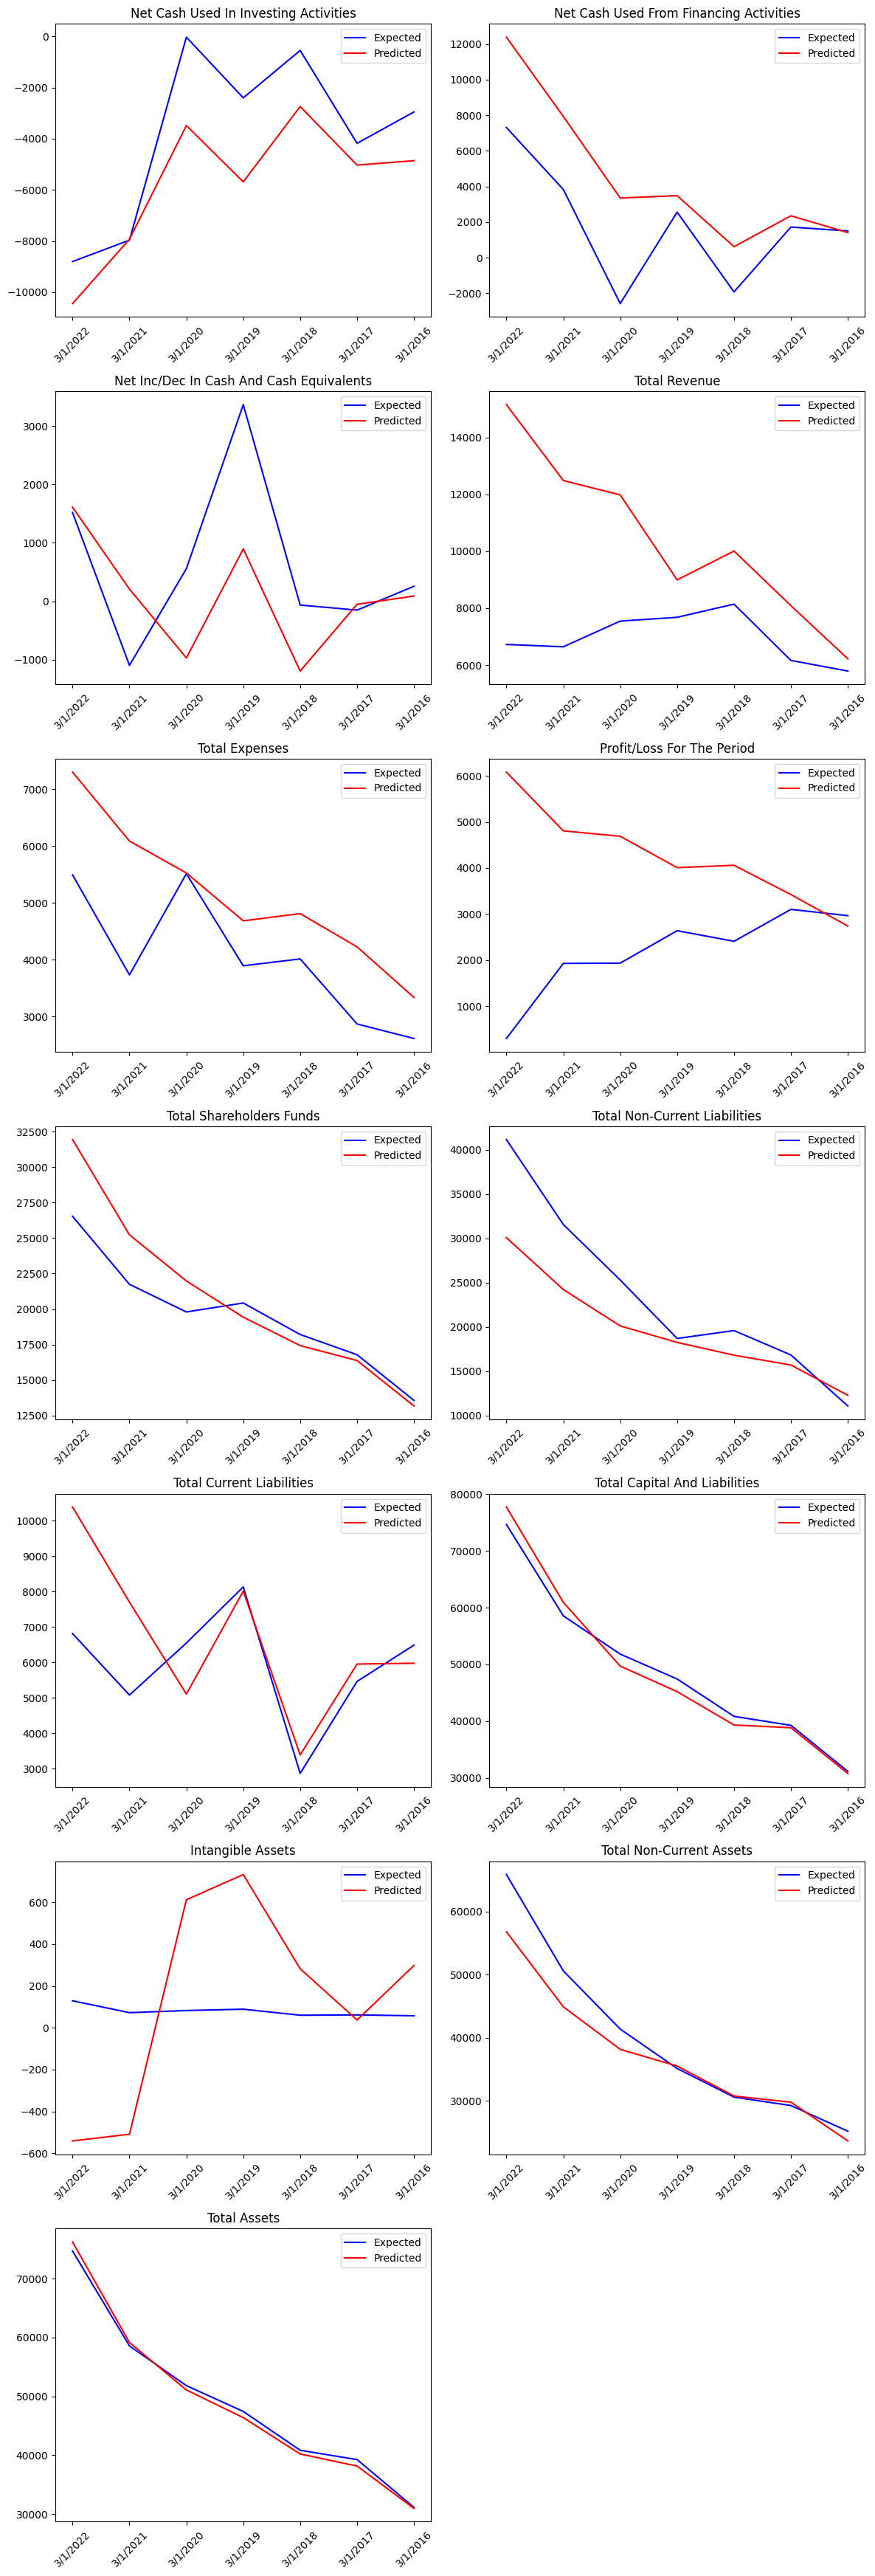

RMSE for Net Cash Used In Investing Activities: 2223.0531
RMSE for Net Cash Used From Financing Activities: 3492.989
RMSE for Net Inc/Dec In Cash And Cash Equivalents: 1279.9612
RMSE for Total Revenue: 4371.2555
RMSE for Total Expenses: 1332.4682
RMSE for Profit/Loss For The Period: 2779.0427
RMSE for Total Shareholders Funds: 2620.1299
RMSE for Total Non-Current Liabilities: 5531.7574
RMSE for Total Current Liabilities: 1792.1945
RMSE for Total Capital And Liabilities: 1972.676
RMSE for Intangible Assets: 476.2244
RMSE for Total Non-Current Assets: 4272.1717
RMSE for Total Assets: 923.7682


In [8]:
#double layer
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

df_1 = final_df.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}

def rnn_preds(df, column_name):
    test_size = int(len(df) * 0.4)
    X_train = df.iloc[test_size:].drop(column_name, axis=1).values
    y_train = df.iloc[test_size:][column_name].values
    X_test = df.iloc[:test_size].drop(column_name, axis=1).values
    y_test = df.iloc[:test_size][column_name].values

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(SimpleRNN(90, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(SimpleRNN(60, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam())

    model.fit(X_train, y_train, epochs=120, batch_size=16, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse


columns_to_predict = df_1.columns
num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = rnn_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

    # Set x-axis labels with corresponding months
    ax.set_xticks(range(len(y_test)))
    ax.set_xticklabels(df_1.index[:len(y_test)], rotation=45)

if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse, 4)}")

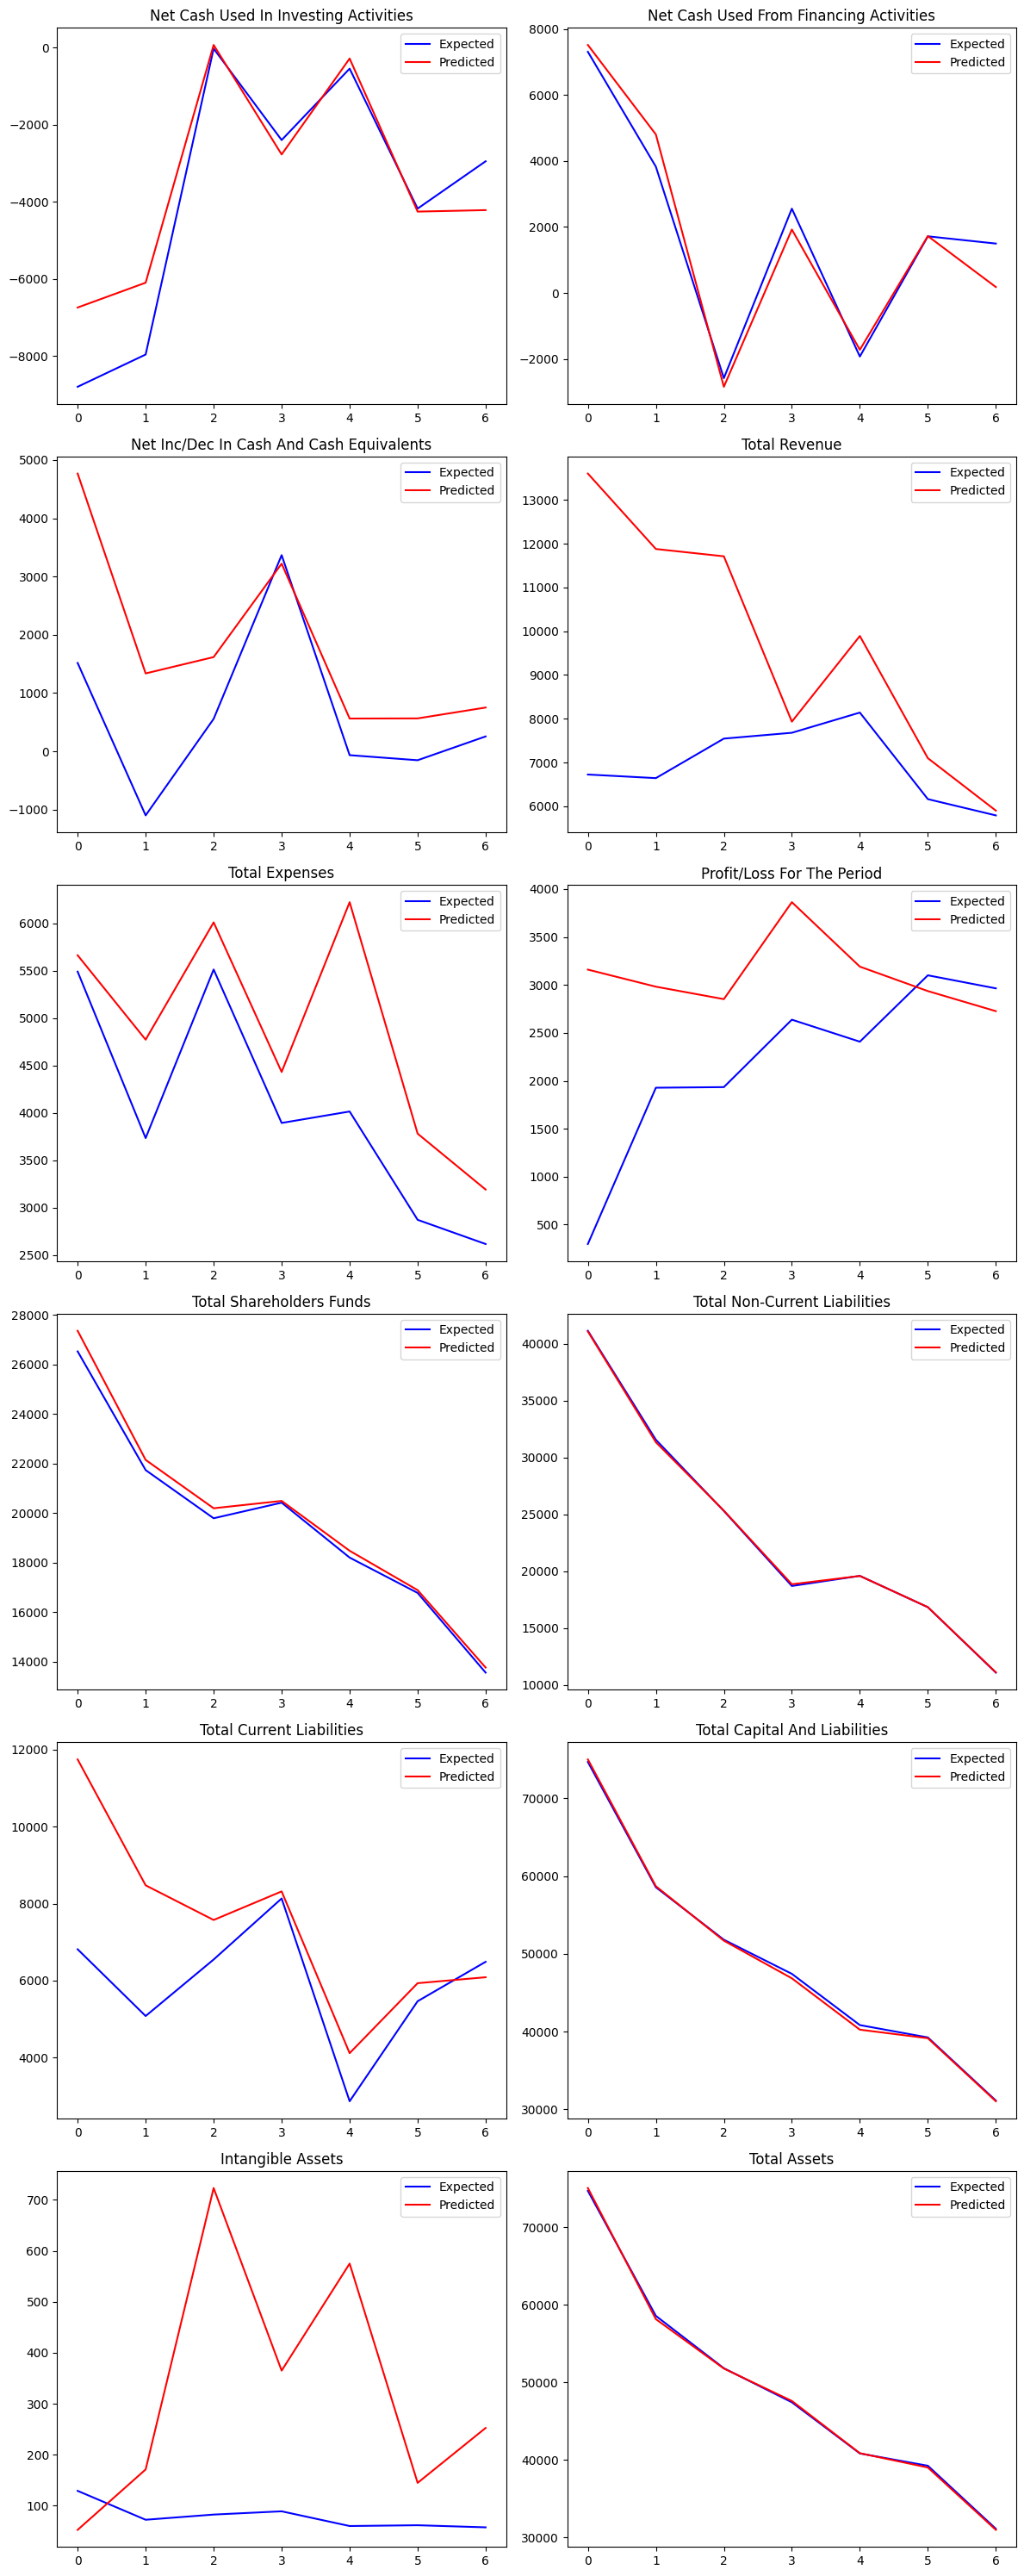

RMSE for Net Cash Used In Investing Activities: 1166.6228
RMSE for Net Cash Used From Financing Activities: 680.6564
RMSE for Net Inc/Dec In Cash And Cash Equivalents: 1638.1721
RMSE for Total Revenue: 3703.8406
RMSE for Total Expenses: 1048.5567
RMSE for Profit/Loss For The Period: 1328.0402
RMSE for Total Shareholders Funds: 406.954
RMSE for Total Non-Current Liabilities: 104.2605
RMSE for Total Current Liabilities: 2355.6545
RMSE for Total Capital And Liabilities: 345.3073
RMSE for Intangible Assets: 340.7331
RMSE for Total Assets: 243.0744


In [20]:
#MLP 2
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = final_df.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}  # New dictionary to store RMSE values

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.4)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(20,40,30), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse,4)}")

In [47]:
#no
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df_1 = final_df.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}

def rnn_train(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Prepare the data
    y = df[column_name].values
    X = np.arange(len(y)).reshape(-1, 1)

    # Normalize the data
    y_mean, y_std = y.mean(), y.std()
    y_normalized = (y - y_mean) / y_std

    # Build the RNN model
    model = Sequential()
    model.add(LSTM(80, activation='relu', input_shape=(1, 1)))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X, y_normalized, epochs=50, batch_size=1, verbose=0)

    return model, y_mean, y_std

def rnn_forecast(model, y_mean, y_std):
    # Generate predicted dates for the forecast
    last_date = df_1.index[-1]
    predicted_dates = pd.date_range(start=last_date, periods=11, freq='AS-MAR')

    # Create input for forecasting
    X_forecast = np.arange(len(df_1), len(df_1) + len(predicted_dates)).reshape(-1, 1)

    # Make predictions
    y_pred_normalized = model.predict(X_forecast)
    y_pred = (y_pred_normalized * y_std) + y_mean

    return y_pred.flatten(), predicted_dates

# Iterate over columns in df_1
for column_name in df_1.columns:
    model, y_mean, y_std = rnn_train(df_1[column_name], column_name)
    y_pred, predicted_dates = rnn_forecast(model, y_mean, y_std)

    # Pad the predictions with NaN to match the length of the index
    pad_length = len(df_1) - len(y_pred)
    y_pred_padded = np.pad(y_pred, (pad_length, 0), mode='constant', constant_values=np.nan)

    predictions_df[column_name] = y_pred_padded
    predictions_dict[column_name] = y_pred_padded
    predictions_df.index = df_1.index

predictions_df.index.name = 'year'  # Set the name of the index column



1/1 [==============================] - 0s 235ms/step


In [49]:
predictions_df

,Net Cash Used In Investing Activities,Net Cash Used From Financing Activities,Net Inc/Dec In Cash And Cash Equivalents,Total Revenue,Total Expenses,Profit/Loss For The Period,Total Shareholders Funds,Total Non-Current Liabilities,Total Current Liabilities,Total Capital And Liabilities,Intangible Assets,Total Assets
year,,,,,,,,,,,,
3/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2014,211.400635,-36.807129,64.273178,-501.284912,-146.228760,-437.281128,-720.015625,965.464844,-256.052246,-1201.042969,74.978195,435.990234


['Net Inc/Dec In Cash And Cash Equivalents', 'Total Capital And Liabilities', 'Total Revenue', 'Total Expenses', 'Profit/Loss For The Period', 'Total Shareholders Funds', 'Total Non-Current Liabilities', 'Total Current Liabilities', 'Net Cash Used From Financing Activities', 'Intangible Assets', 'Total Assets', 'Net Cash Used In Investing Activities']
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 64)                19712     
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 1.0853 - val_loss: 1.93

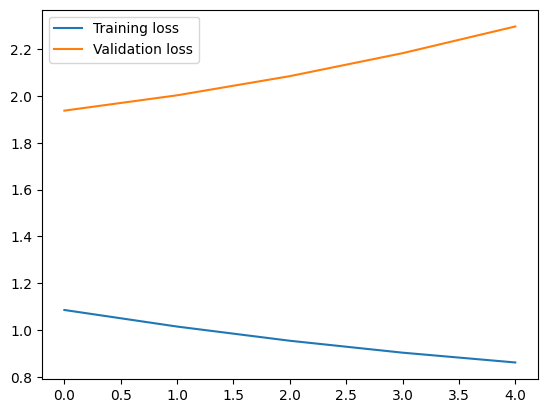

In [57]:
# try
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.optimizers import Adam
#from datetime import datetime

#Read the csv file
df = pd.read_csv('..\\data\\final_analysis.csv')
df = df.sort_values("year")
df = df.reset_index(drop=True)


#Separate dates for future plotting
train_dates = pd.to_datetime(df['year']) 

#Variables for training
cols = list(df)[1:13]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer=Adam(), loss='mean_squared_error')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

n_past = 1
n_days_for_prediction=1 #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq="AS-MAR").tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

print(y_pred_future)

In [53]:
# one step prediction
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Read the csv file
df = pd.read_csv('..\\data\\final_analysis_preds2.csv')
df = df.sort_values("months")
df = df.reset_index(drop=True)

# Variables for training
cols = list(df)[1:8]
print(cols)
# New dataframe with only training data - 12 columns
df_for_training = df[cols].astype(float)

# Normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

# Reformat input data into a shape: (n_samples x timesteps x n_features)
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 15  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, :])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

# Define the Autoencoder model
model = Sequential()
model.add(LSTM(128, activation="sigmoid" ,input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Fit the model
history = model.fit(trainX, trainY, epochs=7, batch_size=16, validation_split=0.1, verbose=1)
train_predictions = model.predict(trainX)
prediction_copies_train = np.repeat(train_predictions, df_for_training.shape[1], axis=-1)
train_pred = scaler.inverse_transform(prediction_copies_train)[:,0]
train_true_values = np.repeat(trainY, df_for_training.shape[1], axis=-1)
train_true= scaler.inverse_transform(train_true_values)[:,0]
train_rmse = np.sqrt(mean_squared_error(train_true, train_pred))

print("Root Mean Squared Error (RMSE) on training data:", train_rmse)

n_past = 15
n_days_for_prediction = 1

# Retrieve the last sequence from the training data
last_sequence = df_for_training_scaled[-n_past:]
last_sequence = np.reshape(last_sequence, (1, n_past, len(cols)))

# Make prediction for one value in the future
prediction = model.predict(last_sequence)  # shape = (1, 1)

# Perform inverse transformation to rescale back to the original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

print("Predicted value for one day in the future:", y_pred_future[0])

['Total Income From Operations', 'Employees Cost', 'Depreciation', 'Other Expenses', 'Other Income', 'Interest', 'Net Profit/(Loss) For the Period']
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 128)               69632     
                                                                 
 dense_71 (Dense)            (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
3/3 [==============================] - 2s 140ms/step - loss: 0.8097 - val_loss: 0.1145
Epoch 2/7
3/3 [==============================] - 0s 31ms/step - loss: 0.4849 - val_loss: 0.1665
Epoch 3/7
3/3 [==============================] - 0s 29ms/step - loss: 0.5927 - val_loss: 0.1236
Epoch 4

In [54]:
# defining a function to be used later for forecasting
def mult_time_pred_lstm(df_for_training):

    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)

    trainX = []
    trainY = []

    n_future = 1   
    n_past = 15 

    for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
        trainX.append(df_for_training_scaled[i - n_past:i, :])
        trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)


    model = Sequential()
    model.add(LSTM(128, activation="sigmoid" ,input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
    model.add(Dense(trainY.shape[1]))

    model.compile(optimizer='adam', loss='mean_squared_error')


    history = model.fit(trainX, trainY, epochs=7, batch_size=16, validation_split=0.1,verbose = 0)
    """train_predictions = model.predict(trainX)
    prediction_copies_train = np.repeat(train_predictions, df_for_training.shape[1], axis=-1)
    train_pred = scaler.inverse_transform(prediction_copies_train)[:,0]
    train_true_values = np.repeat(trainY, df_for_training.shape[1], axis=-1)
    train_true= scaler.inverse_transform(train_true_values)[:,0]
    train_rmse = np.sqrt(mean_squared_error(train_true, train_pred))

    print("Root Mean Squared Error (RMSE) on training data:", train_rmse)"""

    n_past = 15
    
    last_sequence = df_for_training_scaled[-n_past:]
    last_sequence = np.reshape(last_sequence, (1, n_past, len(cols)))

    prediction = model.predict(last_sequence)

    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
    return y_pred_future[0] #returns 1 forecast value for the first column in the dataset


In [29]:
# fixing.. move on
df = pd.read_csv('..\\data\\final_analysis2.csv')
df = df.sort_values("months")
df = df.reset_index(drop=True)
#df.to_csv("..\\data\\final_analysis_preds2.csv")

In [86]:
# forecasting for an yr
import pandas as pd

df = pd.read_csv('..\\data\\final_analysis_preds2.csv')

# Variables for training
cols = list(df)[1:8]
one_yr_preds = {}

# Iterate through each column and make it the first column
for column in cols:
    # Select the current column as the target column
    target_column = column

    # New dataframe with target column as the first column
    df_for_training = df[[target_column] + [col for col in cols if col != target_column]].astype(float)

    pred = mult_time_pred_lstm(df_for_training)
    one_yr_preds[target_column] = round(pred,2)



1/1 [==============================] - 0s 124ms/step


In [87]:
#run this for every yr to append to previous df
df_one_yr_preds = pd.DataFrame([one_yr_preds])
df_one_yr_preds["months"] = '2027-03'
# df_one_yr_preds["year"] = df_one_yr_preds["year"].astype(str)
df_combined = pd.concat([df, df_one_yr_preds], ignore_index=True)
df_combined = df_combined.reset_index(drop = True)
# Save the combined DataFrame to a new CSV file
df_combined.to_csv("..\\data\\final_analysis_preds2.csv", index=False)

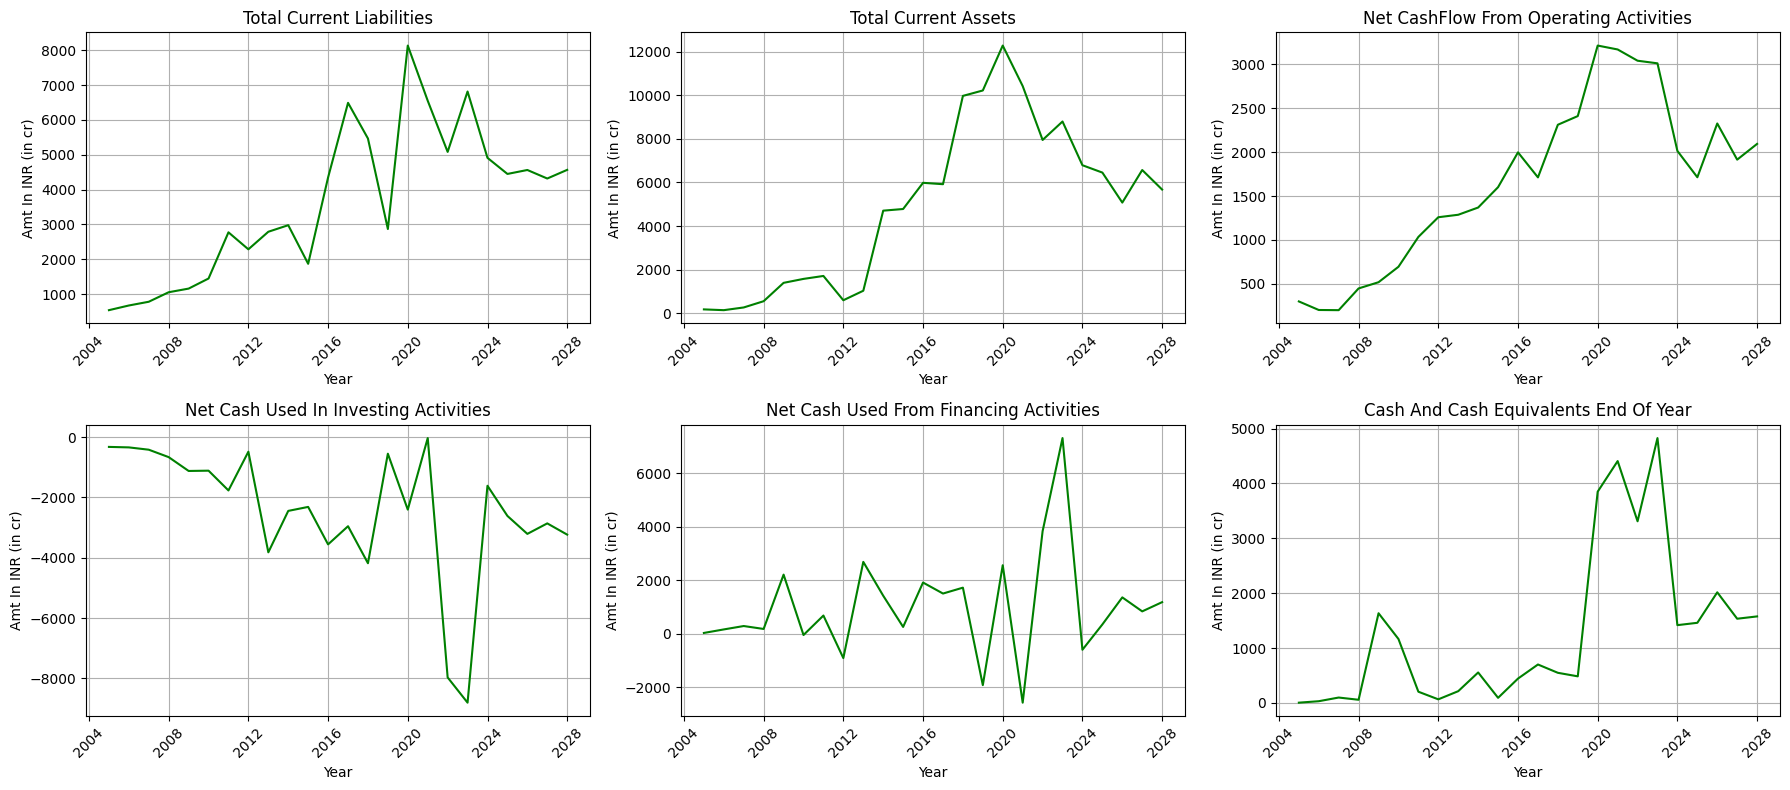

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("..\\data\\final_analysis_preds1.csv")
def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define the date range from 2004 to 2022
    start_date = pd.Timestamp('2004-01-01')
    end_date = pd.Timestamp('2027-12-31')
    date_range = pd.date_range(start=start_date, end=end_date, freq='A')

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        ax.plot(date_range, df[col], color="green")
        ax.set_title(col)
        ax.set_xlabel('Year')
        ax.set_ylabel('Amt In INR (in cr)')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', labelrotation=45)

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()

plot_columns_in_grid(df)


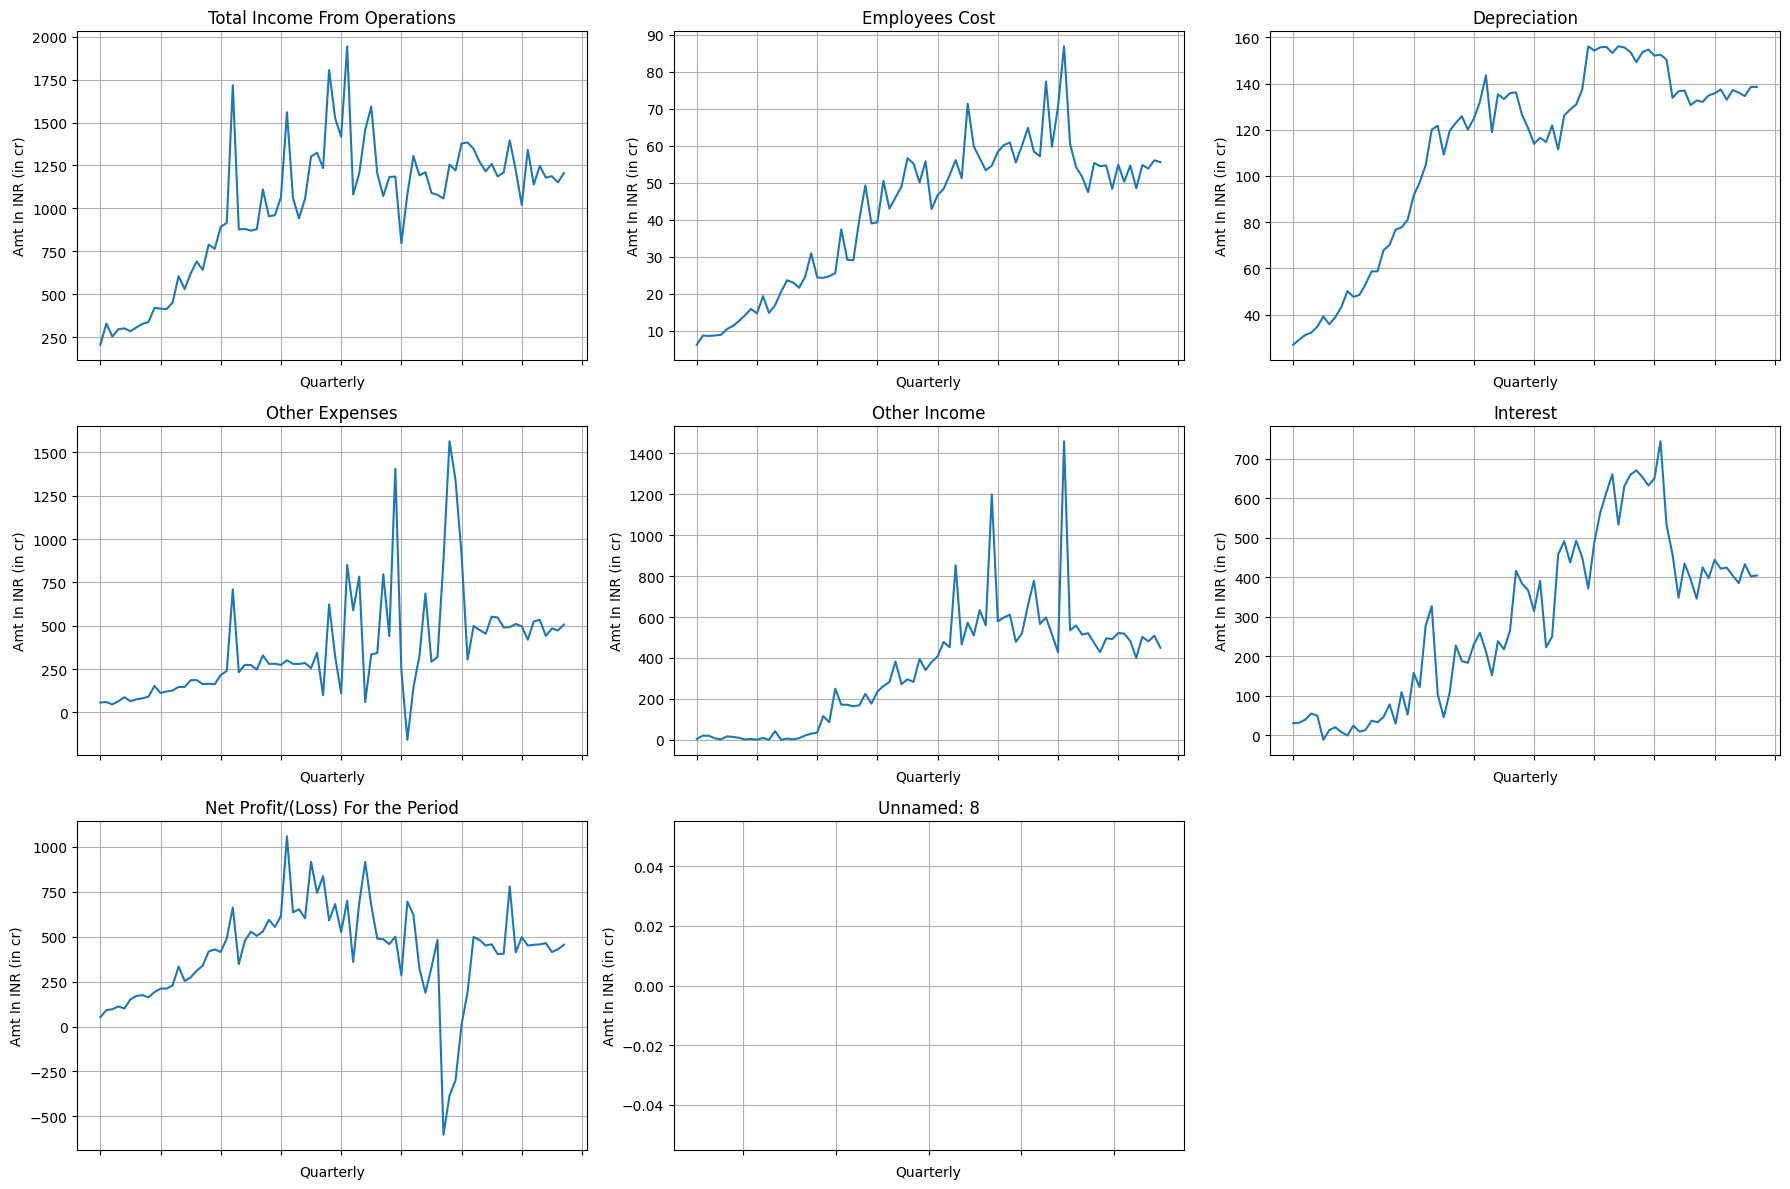

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("..\\data\\final_analysis_preds2.csv")
def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        # Reverse the x-axis values and index
        x_values = df.index
        y_values = df[col]

        ax.plot(x_values, y_values)
        ax.set_title(col)
        ax.set_xlabel('Quarterly')
        ax.set_ylabel('Amt In INR (in cr)')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', rotation=45)

        # Remove x-axis labels
        ax.set_xticklabels([])

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()

plot_columns_in_grid(df)

# the x-axis values range from 2004 to 2022 with 3 months gap each. I removed the indexes because it was too crowded